In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("victims_of_rape.csv")

In [3]:
data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [4]:
# Checking the Null values
data.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [5]:
# Columns datatype
data.dtypes

Area_Name                    object
Year                          int64
Subgroup                     object
Rape_Cases_Reported           int64
Victims_Above_50_Yrs          int64
Victims_Between_10-14_Yrs     int64
Victims_Between_14-18_Yrs     int64
Victims_Between_18-30_Yrs     int64
Victims_Between_30-50_Yrs     int64
Victims_of_Rape_Total         int64
Victims_Upto_10_Yrs           int64
dtype: object

In [6]:
# Getting total Rape cases according to year
df = data.groupby(['Year']).agg({"Rape_Cases_Reported":"sum"})

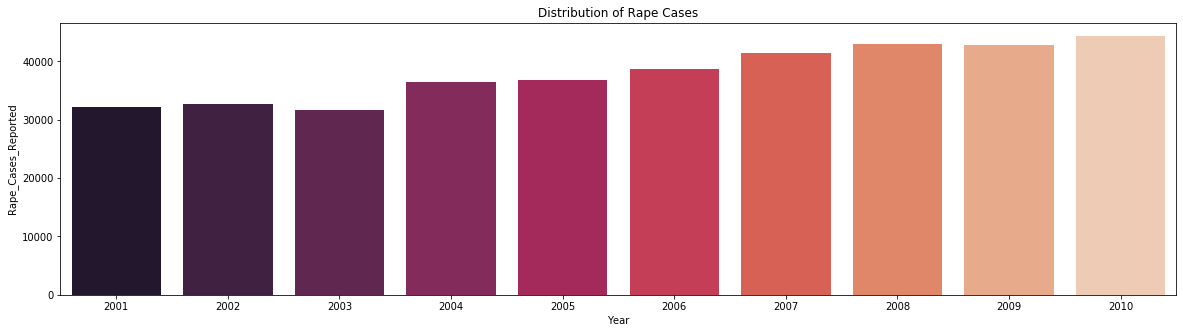

In [7]:
# Year-wise cases
plt.figure(figsize=(20,5))
sns.barplot(x=df.index,y=df['Rape_Cases_Reported'],palette='rocket')
plt.title("Distribution of Rape Cases")
plt.xticks(rotation=0)
plt.show()

In [8]:
# Average Rape cases in these 10 years
print("Average cases of rape in these 10 years :",np.round(df["Rape_Cases_Reported"].mean()))

Average cases of rape in these 10 years : 38002.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

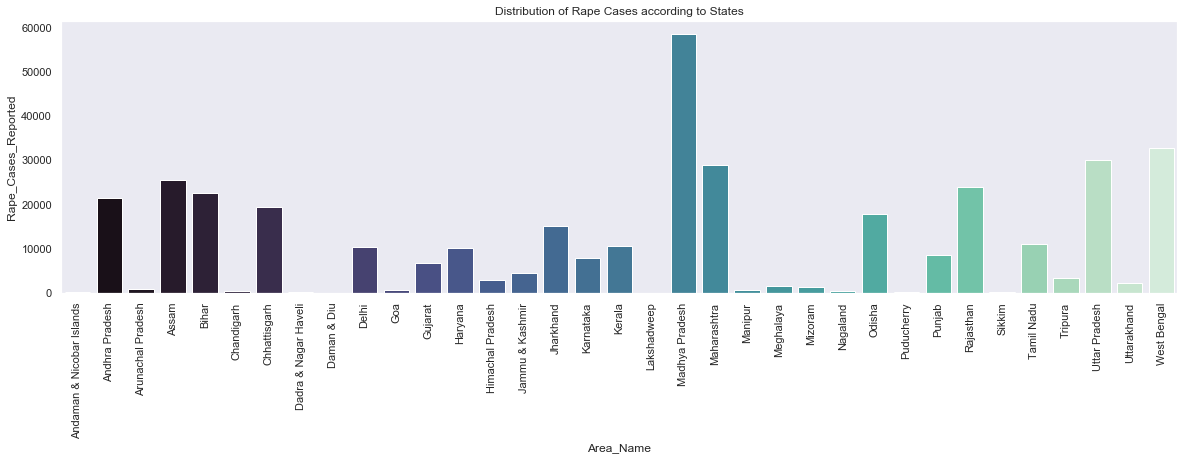

In [9]:
sns.set(style="dark")
df1 = data.groupby(['Area_Name']).agg({"Rape_Cases_Reported":"sum"})
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['Rape_Cases_Reported'],palette='mako')
plt.title("Distribution of Rape Cases according to States")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

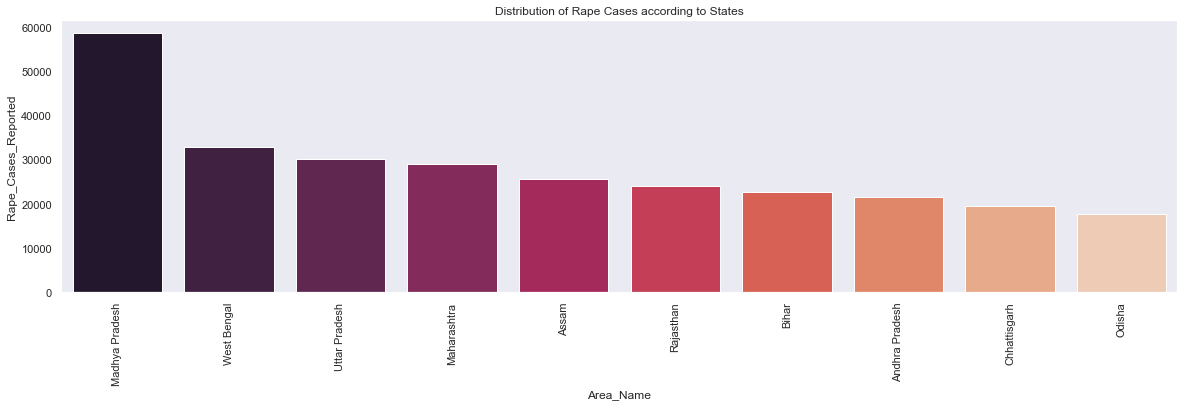

In [10]:
# Top 10 states with maximum number of cases
sns.set(style="dark")
df1 = data.groupby(['Area_Name']).agg({"Rape_Cases_Reported":"sum"}).sort_values(by=['Rape_Cases_Reported'],ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['Rape_Cases_Reported'],palette='rocket')
plt.title("Distribution of Rape Cases according to States")
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

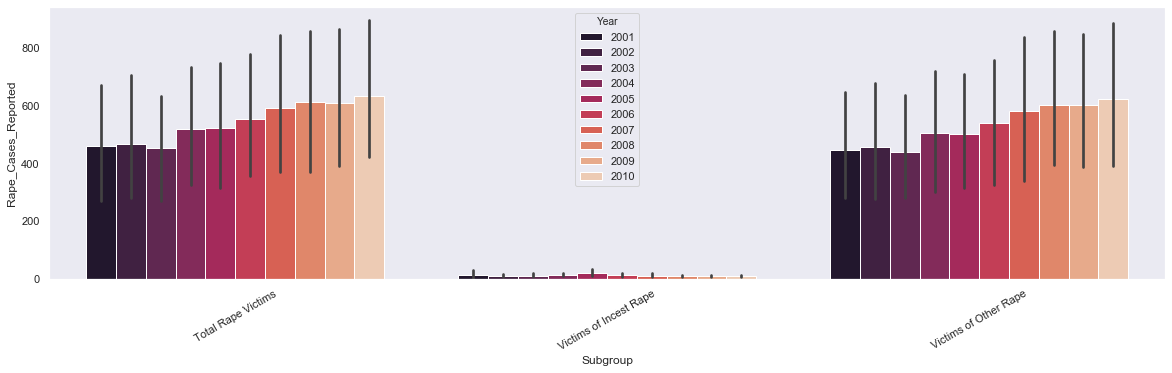

In [11]:
#Plotting Rape_case_Reported on the basis of year and Subgroup
plt.figure(figsize=(20,5))
sns.barplot(x="Subgroup", y="Rape_Cases_Reported", data=data,hue='Year',palette='rocket')
plt.xticks(rotation=30)

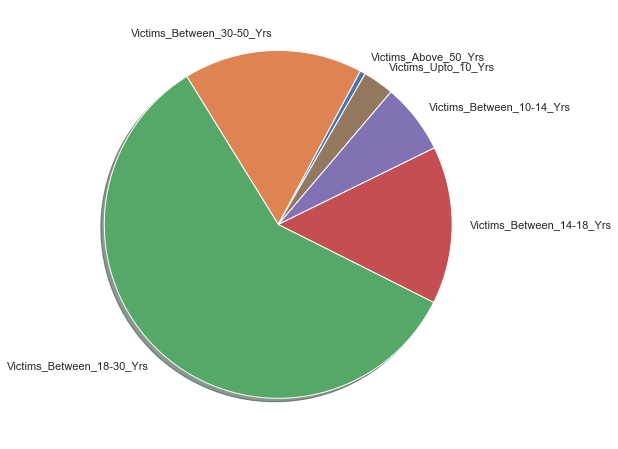

In [12]:
# Analysing the victims according to age
above_50 = data['Victims_Above_50_Yrs'].sum()
aged_30_to_50 = data['Victims_Between_30-50_Yrs'].sum()
aged_18_to_38 = data['Victims_Between_18-30_Yrs'].sum()
aged_14_to_18 = data['Victims_Between_14-18_Yrs'].sum()
aged_10_to_14 = data['Victims_Between_10-14_Yrs'].sum()
aged_upto_10 = data['Victims_Upto_10_Yrs'].sum()
X=['Victims_Above_50_Yrs','Victims_Between_30-50_Yrs','Victims_Between_18-30_Yrs','Victims_Between_14-18_Yrs','Victims_Between_10-14_Yrs',
      'Victims_Upto_10_Yrs']
Y = [above_50,aged_30_to_50,aged_18_to_38,aged_14_to_18,aged_10_to_14,aged_upto_10]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(Y, labels=X,shadow=True, startangle=60,counterclock=True)
plt.show()

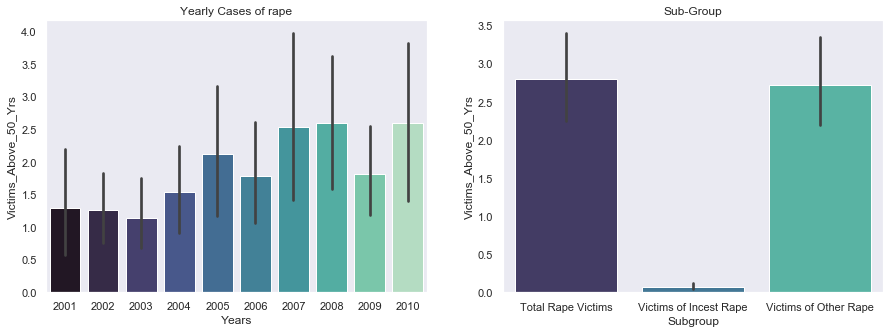

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Year',y='Victims_Above_50_Yrs',data=data,ax=ax1,palette='mako')
sns.barplot(x='Subgroup',y='Victims_Above_50_Yrs',data=data,ax=ax2,palette='mako')
ax1.set_xlabel("Years")
ax2.set_xlabel("Subgroup")
ax1.set_ylabel("Victims_Above_50_Yrs")
ax2.set_ylabel("Victims_Above_50_Yrs")
ax1.set_title("Yearly Cases of rape")
ax2.set_title("Sub-Group")
plt.show()

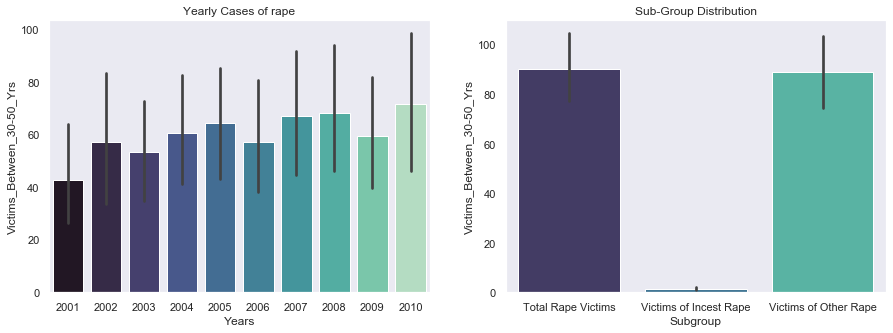

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Year',y='Victims_Between_30-50_Yrs',data=data,ax=ax1,palette='mako')
sns.barplot(x='Subgroup',y='Victims_Between_30-50_Yrs',data=data,ax=ax2,palette='mako')
ax1.set_xlabel("Years")
ax2.set_xlabel("Subgroup")
ax1.set_ylabel("Victims_Between_30-50_Yrs")
ax2.set_ylabel("Victims_Between_30-50_Yrs")
ax1.set_title("Yearly Cases of rape")
ax2.set_title("Sub-Group Distribution")
plt.show()

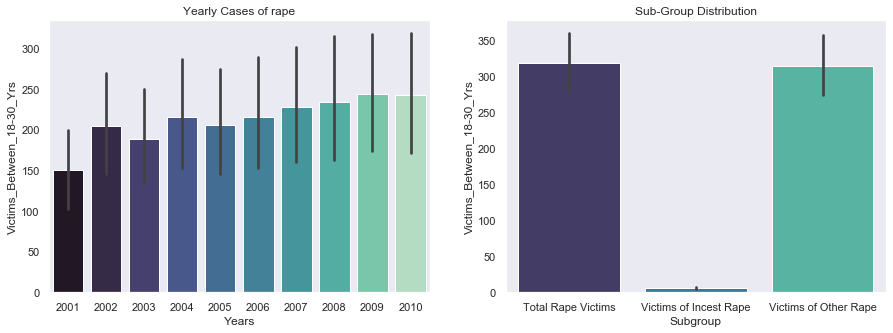

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Year',y='Victims_Between_18-30_Yrs',data=data,ax=ax1,palette='mako')
sns.barplot(x='Subgroup',y='Victims_Between_18-30_Yrs',data=data,ax=ax2,palette='mako')
ax1.set_xlabel("Years")
ax2.set_xlabel("Subgroup")
ax1.set_ylabel("Victims_Between_18-30_Yrs")
ax2.set_ylabel("Victims_Between_18-30_Yrs")
ax1.set_title("Yearly Cases of rape")
ax2.set_title("Sub-Group Distribution")
plt.show()

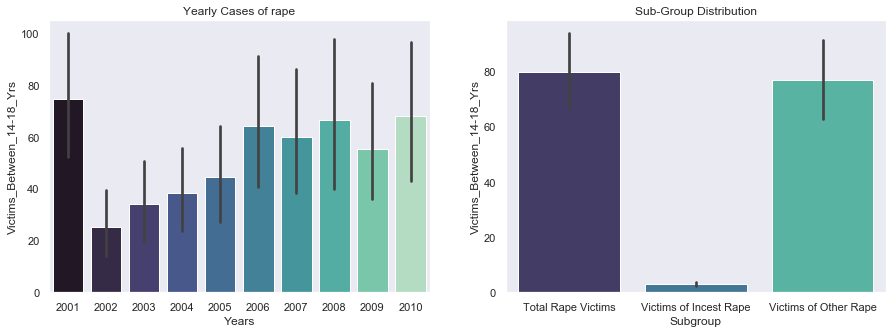

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Year',y='Victims_Between_14-18_Yrs',data=data,ax=ax1,palette='mako')
sns.barplot(x='Subgroup',y='Victims_Between_14-18_Yrs',data=data,ax=ax2,palette='mako')
ax1.set_xlabel("Years")
ax2.set_xlabel("Subgroup")
ax1.set_ylabel("Victims_Between_14-18_Yrs")
ax2.set_ylabel("Victims_Between_14-18_Yrs")
ax1.set_title("Yearly Cases of rape")
ax2.set_title("Sub-Group Distribution")
plt.show()

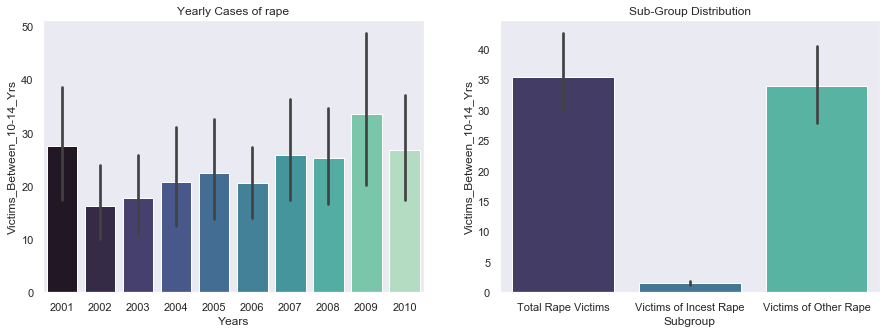

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Year',y='Victims_Between_10-14_Yrs',data=data,ax=ax1,palette='mako')
sns.barplot(x='Subgroup',y='Victims_Between_10-14_Yrs',data=data,ax=ax2,palette='mako')
ax1.set_xlabel("Years")
ax2.set_xlabel("Subgroup")
ax1.set_ylabel("Victims_Between_10-14_Yrs")
ax2.set_ylabel("Victims_Between_10-14_Yrs")
ax1.set_title("Yearly Cases of rape")
ax2.set_title("Sub-Group Distribution")
plt.show()

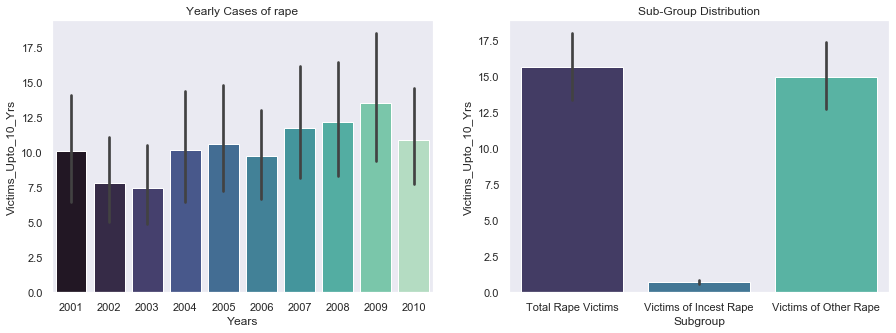

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Year',y='Victims_Upto_10_Yrs',data=data,ax=ax1,palette='mako')
sns.barplot(x='Subgroup',y='Victims_Upto_10_Yrs',data=data,ax=ax2,palette='mako')
ax1.set_xlabel("Years")
ax2.set_xlabel("Subgroup")
ax1.set_ylabel("Victims_Upto_10_Yrs")
ax2.set_ylabel("Victims_Upto_10_Yrs")
ax1.set_title("Yearly Cases of rape")
ax2.set_title("Sub-Group Distribution")
plt.show()